In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import seaborn as sns


# Exploratory Data Analysis

Recommended: 
- https://learningds.org/intro.html (Chapters 10 and 11)
- https://inferentialthinking.com/chapters/07/Visualization.html (Chapter 7)

## Summary Statistics

* Data: https://www.kaggle.com/datasets/crawford/80-cereals

## EDA
* Business Understanding
* Data Understanding
* Data Preparation

In [9]:
cereal = pd.read_csv('data/cereal.csv')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,Cold,110,2,2,200,1.0,14.0,8,1,25,3,1.0,0.75,34.384843


## Numerical and Categorical Columns

### Categorical data

Consists of qualitative observations such as characteristics - things generally containing words

**Examples**:
- Colours
- Names

### Numerical data
* These data are usually expressed with numbers

**Examples**:
* Measurements
* Quantities


In [10]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


## Describe
* By default only shows numerical columns.
* Gives us different summary statistics:
    * `count`: the number of non-NA/null observations
    * `mean`: the mean of the column
    * `std`: the standard deviation of a column
    * `min`: the min value for a column
    * `max`: the max value for a column
    * By default the 25, 50 and 75 percentile of the observations are also included

In [11]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.623377,6.948052,96.129870,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.188138,4.403635,71.215823,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


* We can include categorical variables to the describe
* With `include='all'`, we add some statistics about categorical columns including:
* `unique: which indicates the number of unique observations
* `top`: which tells up the observations value that is most occurring
* `freq`: which informs us of the frequency of the most occurring observation

In [12]:
cereal.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,Cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.623377,6.948052,96.129870,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.188138,4.403635,71.215823,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


## Single statistics

* We can use some pandas function to get single statistics, such as:
* `mean()`
* `std()`
* `count()`
* `median()`
* `sum()`

In [13]:
ratings = cereal[['rating']]
ratings.mean()

rating    42.665705
dtype: float64

In [14]:
ratings.sum()

rating    3285.259284
dtype: float64

In [15]:
ratings.median()

rating    40.400208
dtype: float64

In [16]:
cereal.mean(numeric_only=True)

calories    106.883117
protein       2.545455
fat           1.012987
sodium      159.675325
fiber         2.151948
carbo        14.623377
sugars        6.948052
potass       96.129870
vitamins     28.246753
shelf         2.207792
weight        1.029610
cups          0.821039
rating       42.665705
dtype: float64

## Frequency Tables and Writting CSVs

* What is frequency?
> The number of times a value occurs withing the data.

In [17]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,Cold,110,2,2,200,1.0,14.0,8,1,25,3,1.0,0.75,34.384843


* What is a Frequency Table?
> A manner of displaying all the possible values of a column in our dataframe and the number of occurences

In [18]:
cereal['mfr'].value_counts()

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

In [19]:
mfr_column = cereal['mfr']
mfr_column

0     N
1     Q
2     K
3     K
4     R
     ..
72    G
73    G
74    R
75    G
76    G
Name: mfr, Length: 77, dtype: object

In [20]:
mfr_freq = mfr_column.value_counts()
mfr_freq

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

## Visualize

* A fundamental part of a data scientist’s toolkit  
* It’s very easy to create visualizations, but much harder to produce **good** ones  
* Two main purposes of data visualization:
    * To explore data  
    * To communicate data  

There are several options of libraries for data visualization.  
The most basic one is **matplotlib**, which already has many plots adapted for pandas:  
https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html  

In addition, for more attractive and/or interactive plots, we have:
- **plotly**
- **seaborn**
- **altair**

You can choose the library you prefer.  
One way to decide which one makes more sense for you is to explore the chart galleries and look for the type of plot you want to create.


### matplotlib

* There is a wide range of tools for visualizing data  
* `matplotlib` is widely used  
* In this course unit we will use `matplotlib.pyplot`  
* We build a visualization step by step and then either display it or save it


In [103]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
pib = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

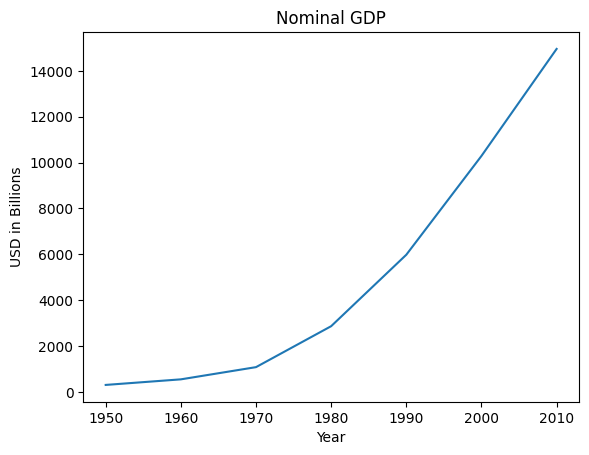

In [104]:
fig, ax = plt.subplots()

ax.plot(years, pib)

ax.set(
    title = 'Nominal GDP',
    xlabel = 'Year',
    ylabel = 'USD in Billions'
);

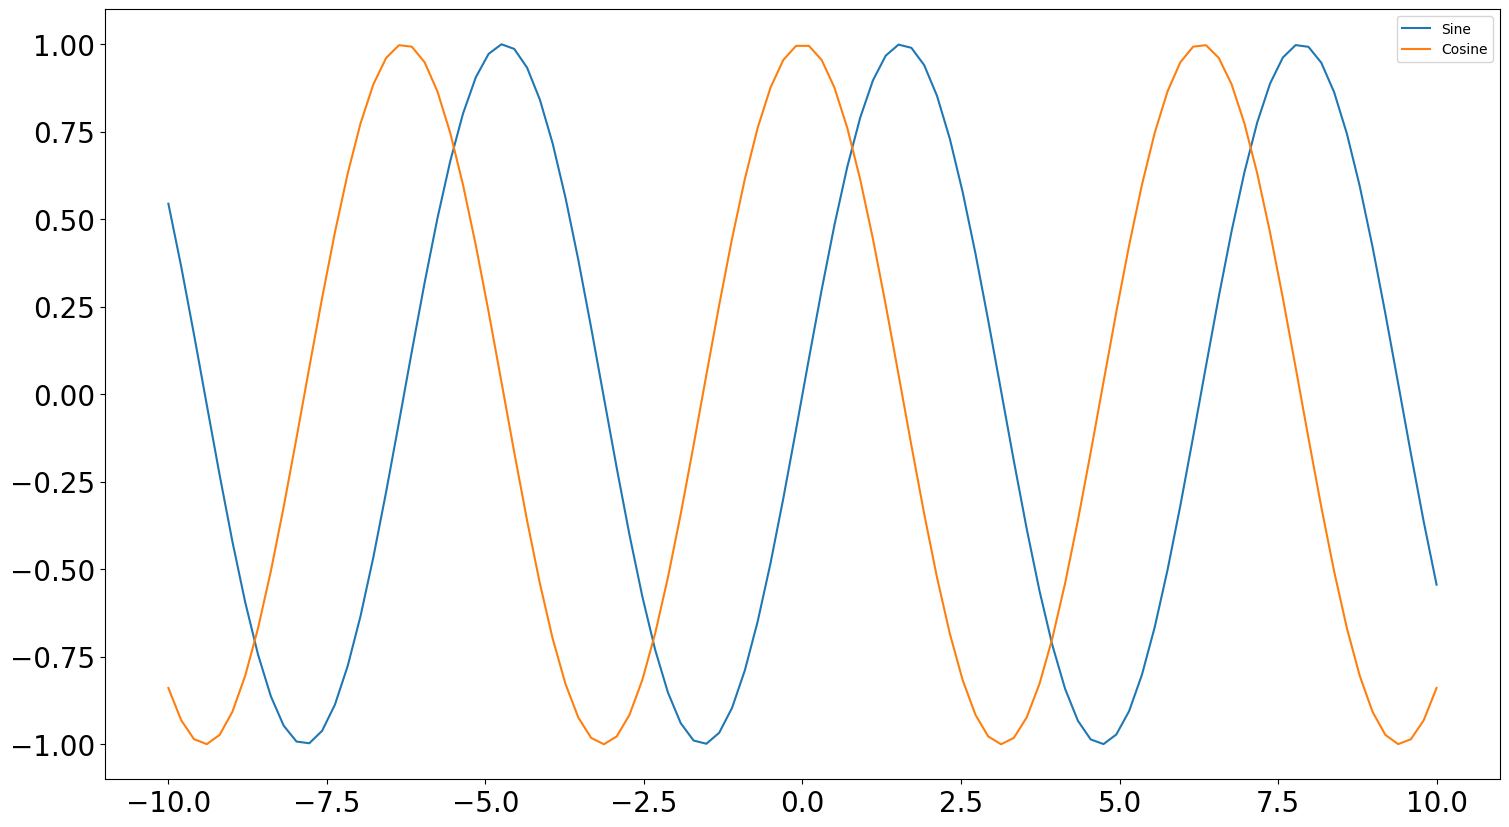

In [105]:
x = np.linspace(-100, 100, 100) * 0.1

plt.figure(figsize=(18, 10))

plt.plot(x, np.sin(x), label='Sine')
plt.plot(x, np.cos(x), label='Cosine')
plt.legend()

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)



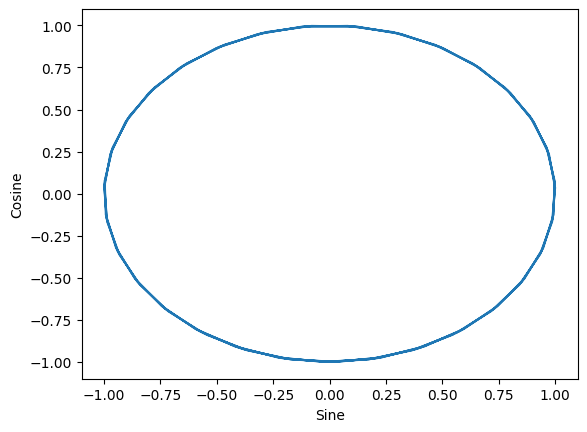

In [106]:
plt.plot(np.sin(x), np.cos(x))
plt.xlabel('Sine')
plt.ylabel('Cosine')
plt.show()

In `matplotlib`, we can see that the chart presents some important issues:
1. The `y` axis does not start at `0`, which can lead to misleading interpretations.  
2. There are no labels on the axes.


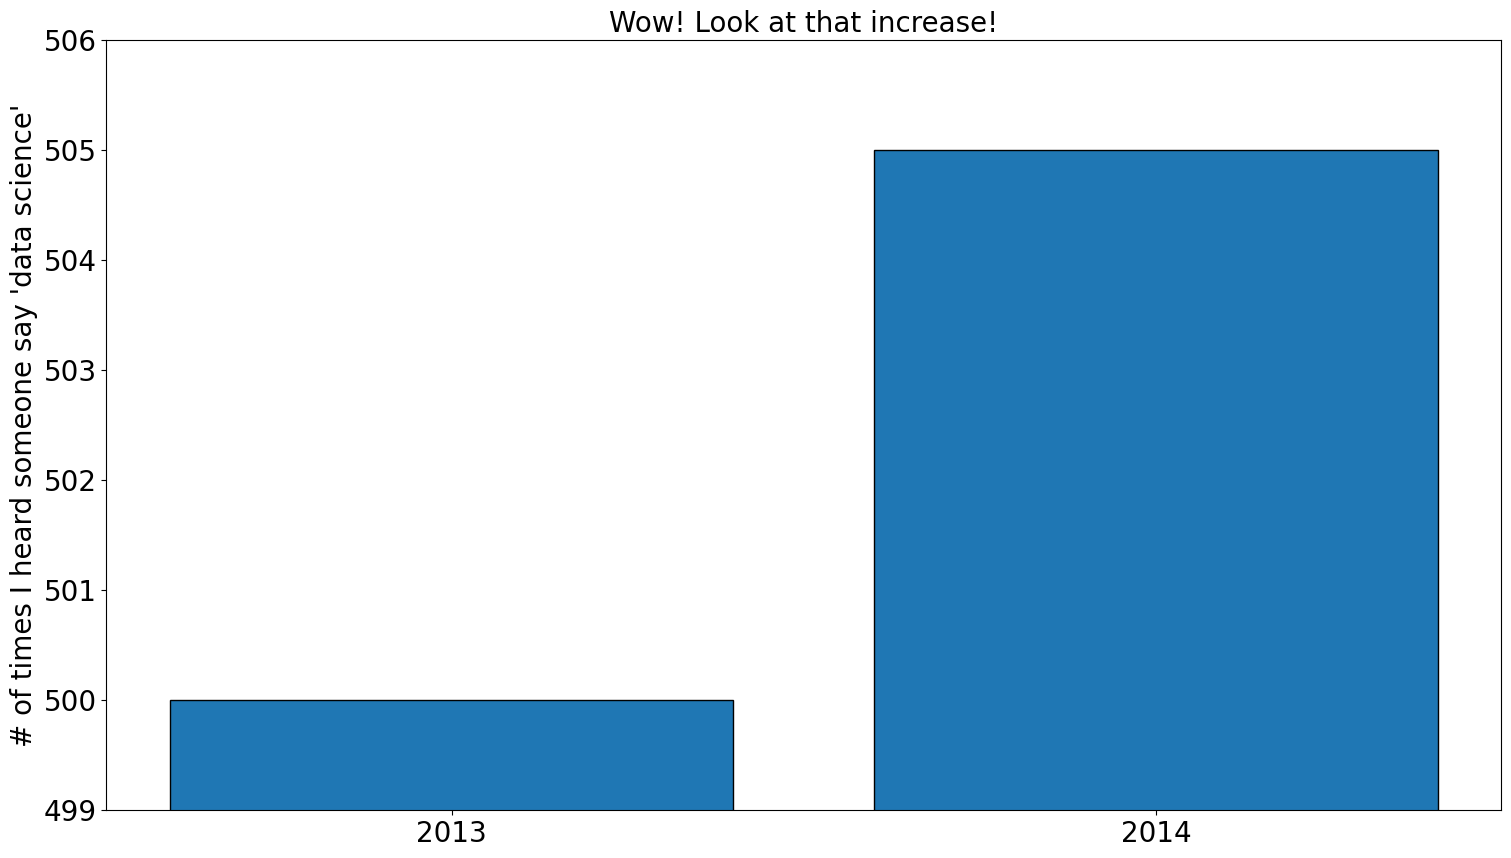

In [107]:
plt.figure(figsize=(18, 10))
mentions = [500, 505]
years = [2013, 2014]

plt.bar(years, mentions, edgecolor='k')

plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# define o os limites do eixo y:
plt.ylim(499,506)

plt.title("Wow! Look at that increase!")

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

In [26]:
plt.figure(figsize=(18, 10))

plt.bar(years, mentions)

plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

plt.ylim(0, max(mentions)*1.1)
plt.title("Hmm... The increase wasn’t that big after all.")

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

## Distributions
* Individuals: those whose attributes are recorded
* Variable: an attribute (column)
    * can be numerical or categorical
    * has different values
        * each individual has exactly one value
    * has a distribution
        * for each different value of the variable, the frequency of individuals that have that value

## A Distribution
Each individual is exactly one category. Percents add up to 100.

![](https://www.pewresearch.org/wp-content/uploads/sites/20/2021/03/ft_2021.03.26_alwaysonline_01.png?resize=1024,440)

Source: https://www.pewresearch.org/short-reads/2021/03/26/about-three-in-ten-u-s-adults-say-they-are-almost-constantly-online/

## Not a Distribution
* Percents of survey respondents on "a major reason they would find it difficult to quarantine themselves for at least 14 days"
    * Each respondent can pick more than one answer
    * The bars represent overlapping groups

Source: https://www.pewresearch.org/internet/2020/10/30/the-challenges-of-contact-tracing-as-u-s-battles-covid-19/

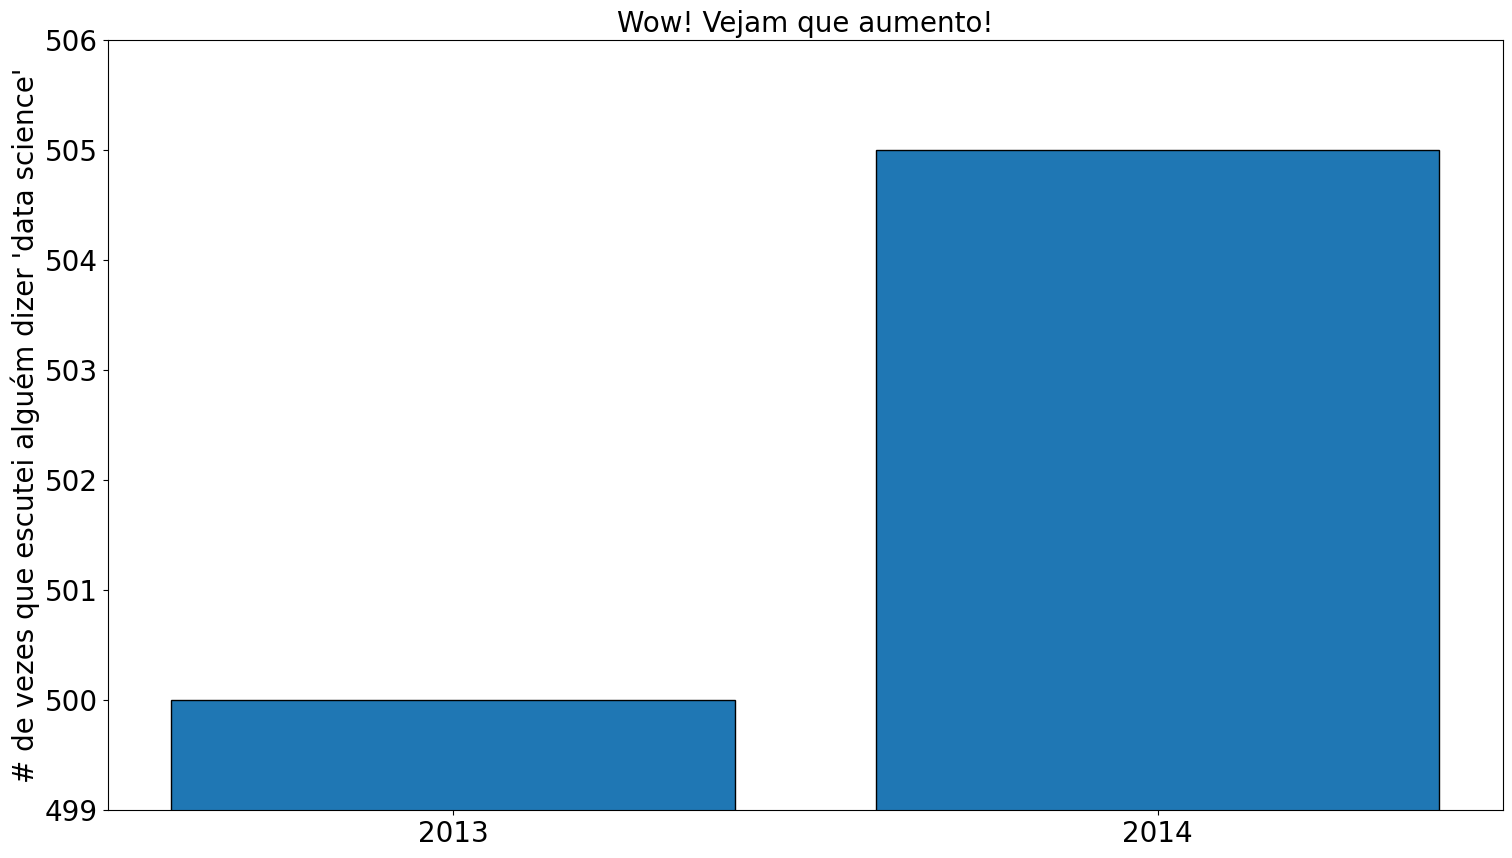

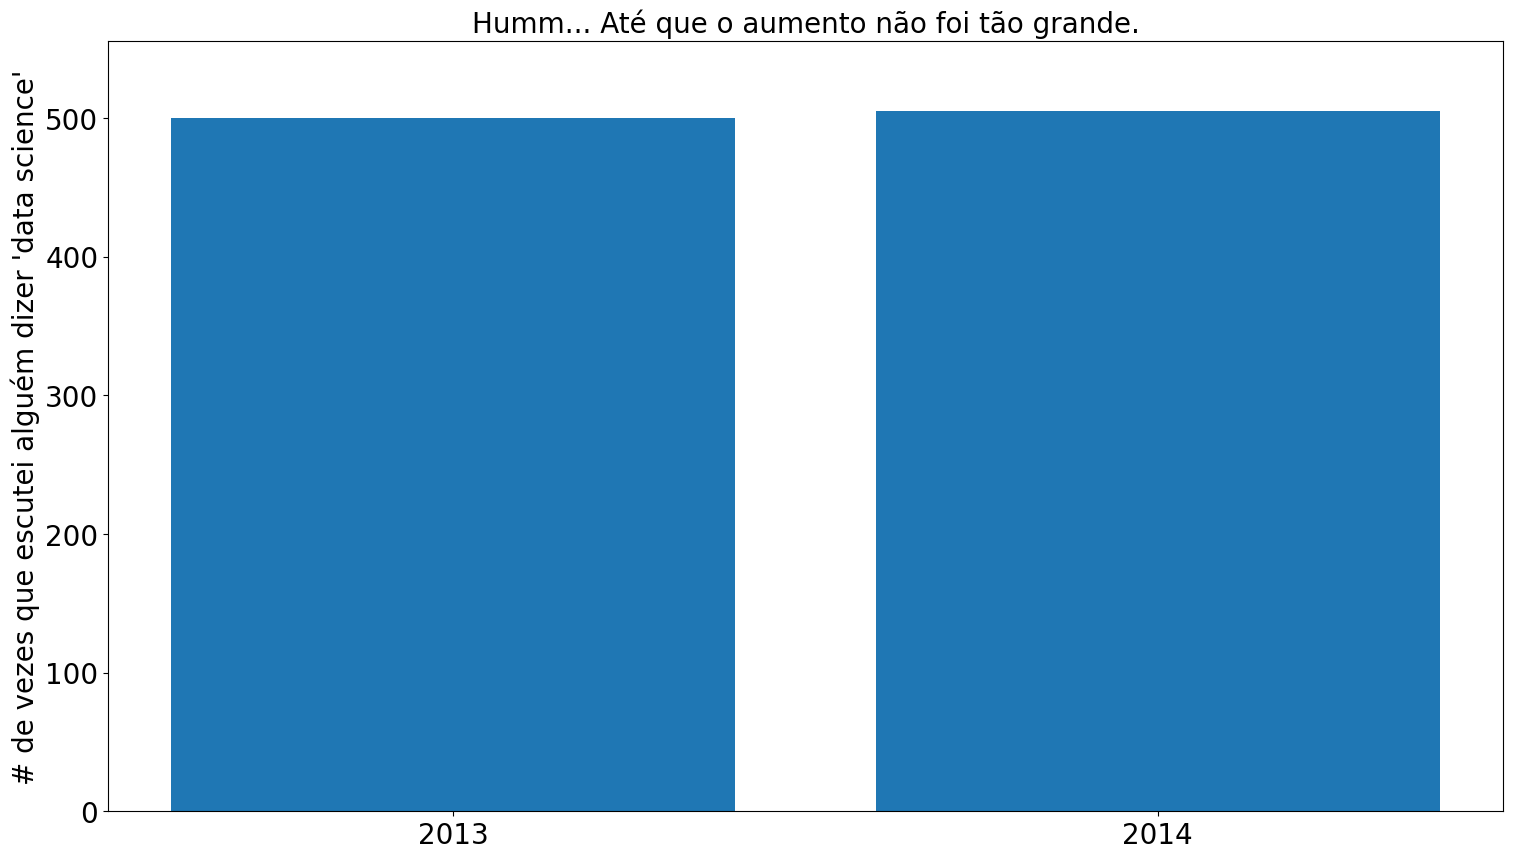

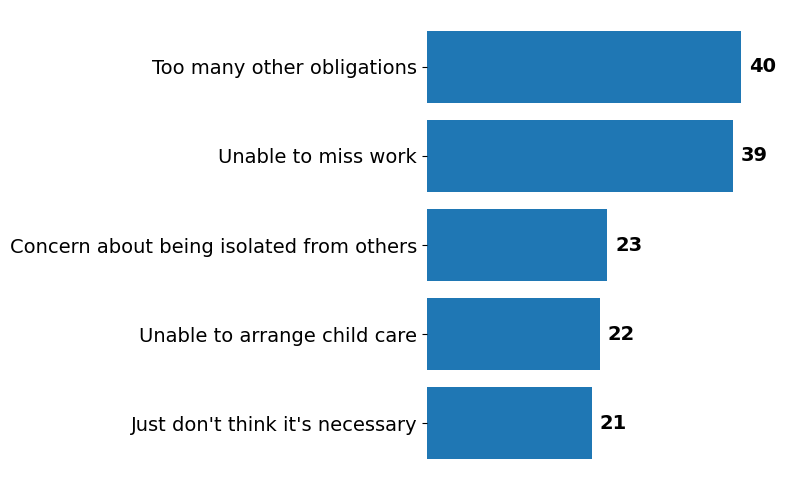

In [27]:
causes = [
    "Too many other obligations",
    "Unable to miss work",
    "Concern about being isolated from others",
    "Unable to arrange child care",
    "Just don't think it's necessary"
]
values = [40, 39, 23, 22, 21]

causes_sorted = causes[::-1]
values_sorted = values[::-1]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(causes_sorted, values_sorted, color='#1f77b4')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x', length=0)
ax.set_xticks([])

for bar in bars:
    width = bar.get_width()
    x_pos = width + 1
    y_pos = bar.get_y() + bar.get_height() / 2

    ax.text(
        x_pos,
        y_pos,
        f'{int(width)}',
        ha='left',
        va='center',
        fontsize=14,
        fontweight='bold',
        color='black'
    )

ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(0, max(values) + 5)

plt.tight_layout()
plt.show()

## Categorical Distributions

### Bar Chart
To display all the values of the variable along with all their frequencies.

* Bar chart
    * One bar for each category
    * You can choose the order of the bars
    * Lenght of bar is the percent (or count) of individuals in that category

Por exemplo, para a tabela de frequências de `cereal`, podemos gerar um gráfico de barras:

In [28]:
cereal['mfr'].value_counts().plot(kind="bar")

<Axes: xlabel='mfr'>

## Numerical Distributions

### Grouping Numerical Values: Binning
* Binning is counting the number of numerical values that lie withing range, called bins
    * Bins are defined by their lower bounds (inclusive)
    * The upper bound is the lower bound of the next bin


### Histogramas
* Displays the distribution of a numerical variable
* One bar corresponding to each bin
* Uses the area principle:
    * The area of each bar is the percent of individuals in the corresponding bin
  

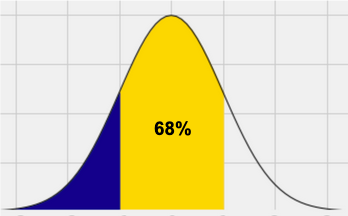

<Axes: >

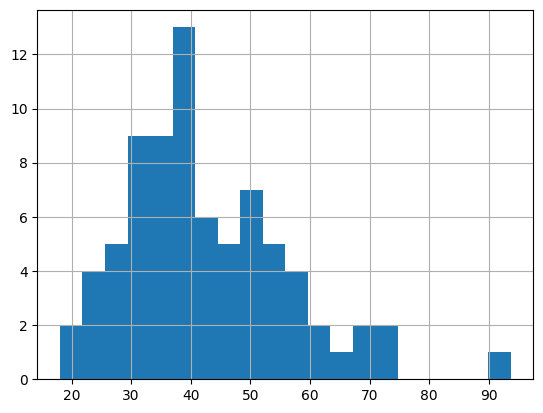

In [44]:
cereal['rating'].hist(bins=20)


<Axes: >

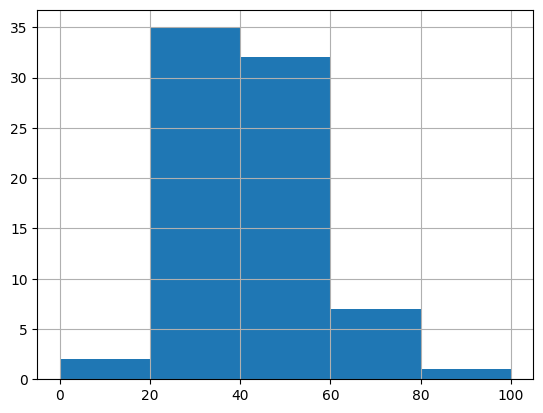

In [46]:
my_bins = [0, 20, 40, 60, 80, 100]
cereal['rating'].hist(bins=my_bins)


<Axes: >

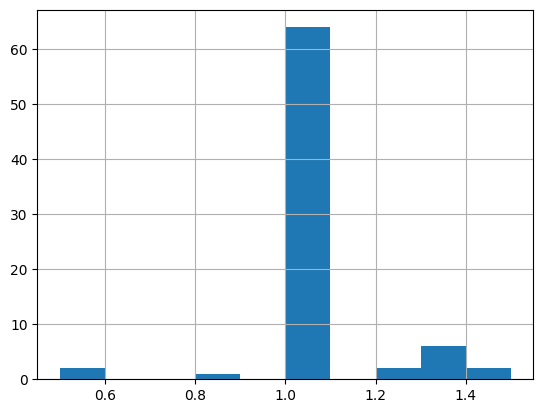

In [35]:
cereal['weight'].hist()

## Density

### Histogram Axes
* By default `hist` uses `density=False`
* If we want the area of the charts to sum to 100% we need to pass `density=True`
* The area of each bar is a percentage of the whole
* The horizontal axis is a number line, and the bins sizes don't have to be equal to each other
* The axis rate is a frequency (`density=False`) or a rate (`density=True`)

gerar os histogramas com base diferente

<Axes: >

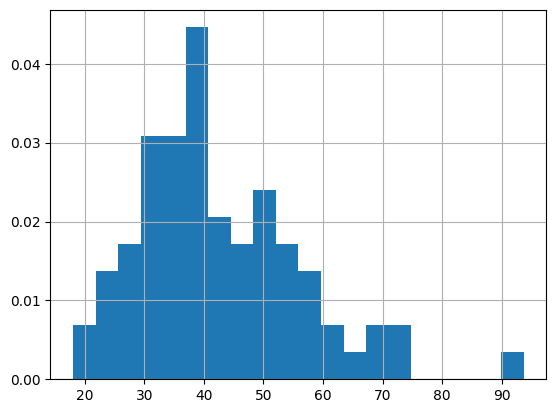

In [47]:
cereal['rating'].hist(bins=20, density=True)

<Axes: >

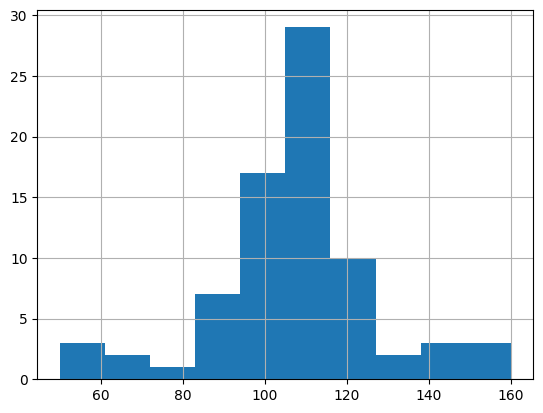

In [49]:
cereal['calories'].hist()

In [50]:
cereal['calories'].min()

np.int64(50)

In [51]:
my_bins = [50, 80, 90, 110, 120, 160]
binned_data = pd.cut(
    x = cereal['calories'],
    bins = my_bins,
    include_lowest = True
)
binned_data

0     (49.999, 80.0]
1     (110.0, 120.0]
2     (49.999, 80.0]
3     (49.999, 80.0]
4      (90.0, 110.0]
           ...      
72     (90.0, 110.0]
73     (90.0, 110.0]
74     (90.0, 110.0]
75     (90.0, 110.0]
76     (90.0, 110.0]
Name: calories, Length: 77, dtype: category
Categories (5, interval[float64, right]): [(49.999, 80.0] < (80.0, 90.0] < (90.0, 110.0] < (110.0, 120.0] < (120.0, 160.0]]

In [58]:
cereal['bin'] = binned_data
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,bins,bin
0,100% Bran,N,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,"(49.999, 80.0]","(49.999, 80.0]"
1,100% Natural Bran,Q,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,"(110.0, 120.0]","(110.0, 120.0]"
2,All-Bran,K,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,"(49.999, 80.0]","(49.999, 80.0]"
3,All-Bran with Extra Fiber,K,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,"(49.999, 80.0]","(49.999, 80.0]"
4,Almond Delight,R,Cold,110,2,2,200,1.0,14.0,8,1,25,3,1.0,0.75,34.384843,"(90.0, 110.0]","(90.0, 110.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,Cold,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,"(90.0, 110.0]","(90.0, 110.0]"
73,Trix,G,Cold,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,"(90.0, 110.0]","(90.0, 110.0]"
74,Wheat Chex,R,Cold,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,"(90.0, 110.0]","(90.0, 110.0]"
75,Wheaties,G,Cold,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,"(90.0, 110.0]","(90.0, 110.0]"


In [61]:
binned_data = cereal['bin'].value_counts().reset_index()
binned_data

,bin,count
0,"(90.0, 110.0]",46
1,"(110.0, 120.0]",10
2,"(120.0, 160.0]",8
3,"(80.0, 90.0]",7
4,"(49.999, 80.0]",6


In [62]:
binned_data['count'].sum()

np.int64(77)

In [73]:
# add a column containing what percent of cereals are in each bin

binned_data['percent'] = binned_data['count']/binned_data['count'].sum()

In [74]:
binned_data

,bin,count,percent
0,"(90.0, 110.0]",46,0.597403
1,"(110.0, 120.0]",10,0.129870
2,"(120.0, 160.0]",8,0.103896
3,"(80.0, 90.0]",7,0.090909
4,"(49.999, 80.0]",6,0.077922


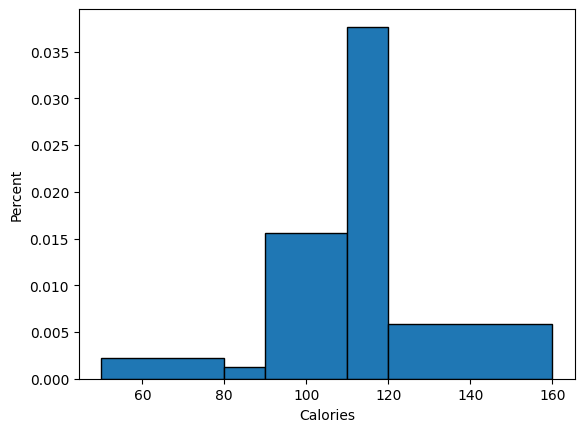

In [78]:
cereal['calories'].hist(bins=my_bins, edgecolor='k', density=True)
plt.ylabel("Percent")
plt.xlabel("Calories")

### How to Calculate Height?

The [90, 110) bin contains 46 out of 77
* 46 out of 77 is 59.7%
* The bin is 110 - 90 = 20 calories wide
$$ \text{Height of bar} = \frac{59.7 \%}{20 \text{ calories}} = 2.985 \text{ percent per calorie}$$

## Height Measures Density

$$ \text{Height} = \frac{\text{\% in bin}}{\text{width of bin}}$$

* The height measures the percent of data in the bin relative to the amount of space in the bin
* Height measures crowdedness, or density
* Units: percent per unit on the horizontal axis

## Area Measures Percent

$$ \text{Area of bar} = \text{% in bin} = \text{Height} \times \text{width of bin}$$

* "How many individuals in the bin?"
  * Use area
* "How crowded is the bin?"
  * Use height

## Discussion Questions

* Compare the bins [110, 120) and [120, 160)
* Which one has more cereals?
* Which one is more crowded?

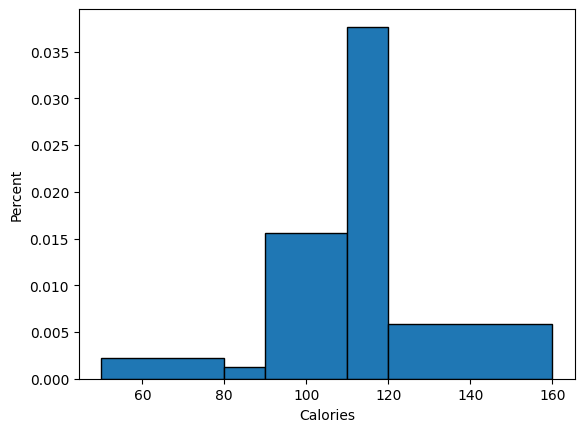

In [79]:
cereal['calories'].hist(bins=my_bins, edgecolor='k', density=True)
plt.ylabel("Percent")
plt.xlabel("Calories")
plt.grid(False)

## Bar Chart or Histogram?

To display a distribution

**Bar Chart**
* Distribution of categorical variable
* Bars have arbitraty (but equal) widths and spacings; in any order
* Height (or length) and area of bars proportional to the percent of individuals

**Histogram**
* Distribution of numerical variable
* Horizontal axis is numerical: drawn to scale, no gaps, bins can be unequal
* Area of bars proportional to the percent of individuals; height measures density

## ECDF

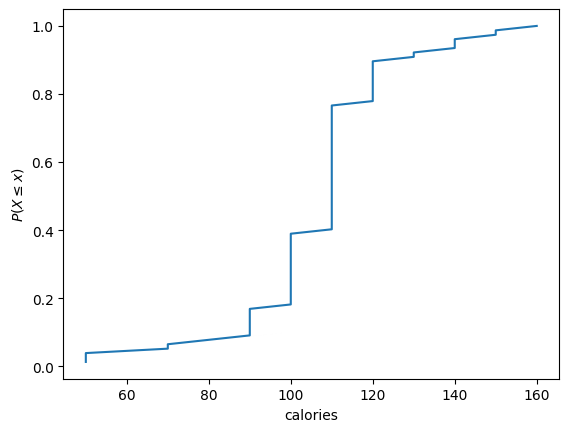

In [113]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(cereal['calories'])
x = ecdf.x
y = ecdf.y
plt.plot(x, y)
plt.xlabel('calories')
plt.ylabel('$P(X \leq x)$');


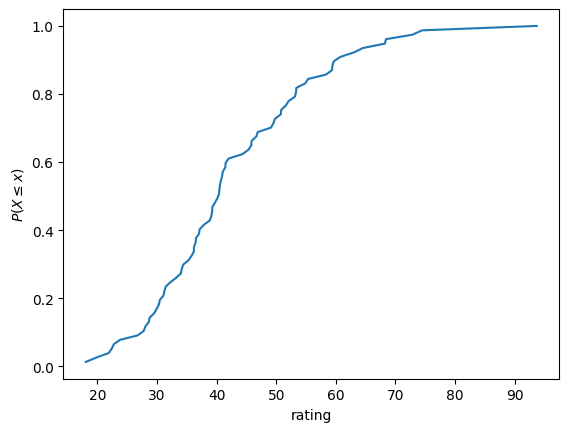

In [114]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(cereal['rating'])
x = ecdf.x
y = ecdf.y
plt.plot(x, y)
plt.xlabel('rating')
plt.ylabel('$P(X \leq x)$');


## Boxplot


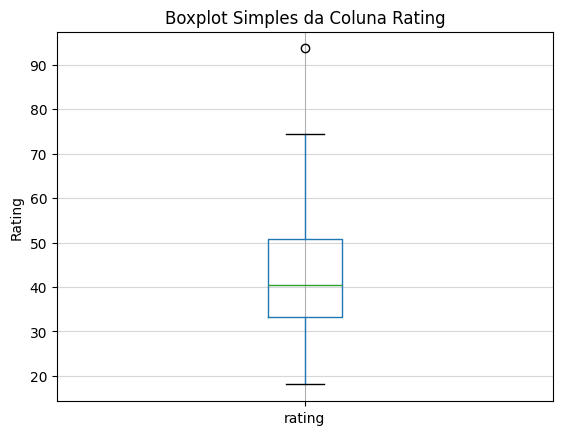

In [84]:


cereal.boxplot(column=['rating']) 

plt.title('Boxplot Rating')
plt.ylabel('Rating')
plt.grid(axis='y', alpha=0.5) 
plt.show()

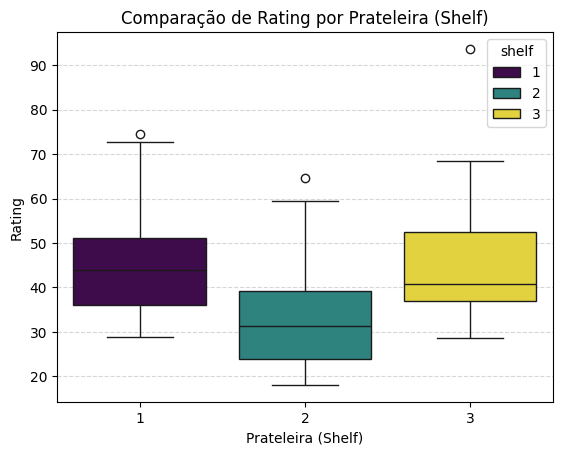

In [87]:
sns.boxplot(
    x='shelf', 
    y='rating', 
    data=cereal,
    palette="viridis",
    hue='shelf'
)

plt.title('Rating by Shelf')
plt.xlabel('Shelf')
plt.ylabel('Rating')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()

## Scatter plot

What other charts can we create with our `cereal` DataFrame?  
We can, for example, look at the relationship between `sugars` and `calories`.

A useful chart for this purpose is the **scatter plot**, which shows the relationship between two variables.

Let’s plot `sugars` on the x-axis and `calories` on the y-axis.

With `matplotlib`, we use the `scatter` plot type and pass the `x` and `y` variables as positional arguments.


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(cereal['sugars'], cereal['calories'])
plt.ylim(ymin=0);
plt.grid()
plt.xlabel('Sugars');
plt.ylabel('Calories');
plt.title('Calories x Sugar');

The DataFrame has 77 cereals, but we don’t see 77 points on the chart.  
This happens because some points overlap.  

It’s possible to adjust the intensity/transparency of each point so that overlapping points appear darker.  
In `matplotlib`, you can simply set the `alpha` parameter to a value less than 1.


In [ ]:
plt.scatter(cereal['sugars'], cereal['calories'], alpha=0.3)
plt.ylim(ymin=0);
plt.xlabel('Sugars');
plt.ylabel('Calories');
plt.title('Calories x Sugar');
plt.grid()

What if we want to change the colors?

In [ ]:
plt.scatter(cereal['sugars'], cereal['calories'], alpha=0.3, color='red')
plt.grid()
plt.xlabel('Sugars');
plt.ylabel('Calories');
plt.title('Calories x Sugar');

In [ ]:
plt.scatter(cereal['sugars'], cereal['calories'], alpha=0.3, color='red')
plt.grid()
plt.ylim(ymin=0);
plt.xlabel('Sugars');
plt.ylabel('Calories');
plt.title('Calories x Sugar');

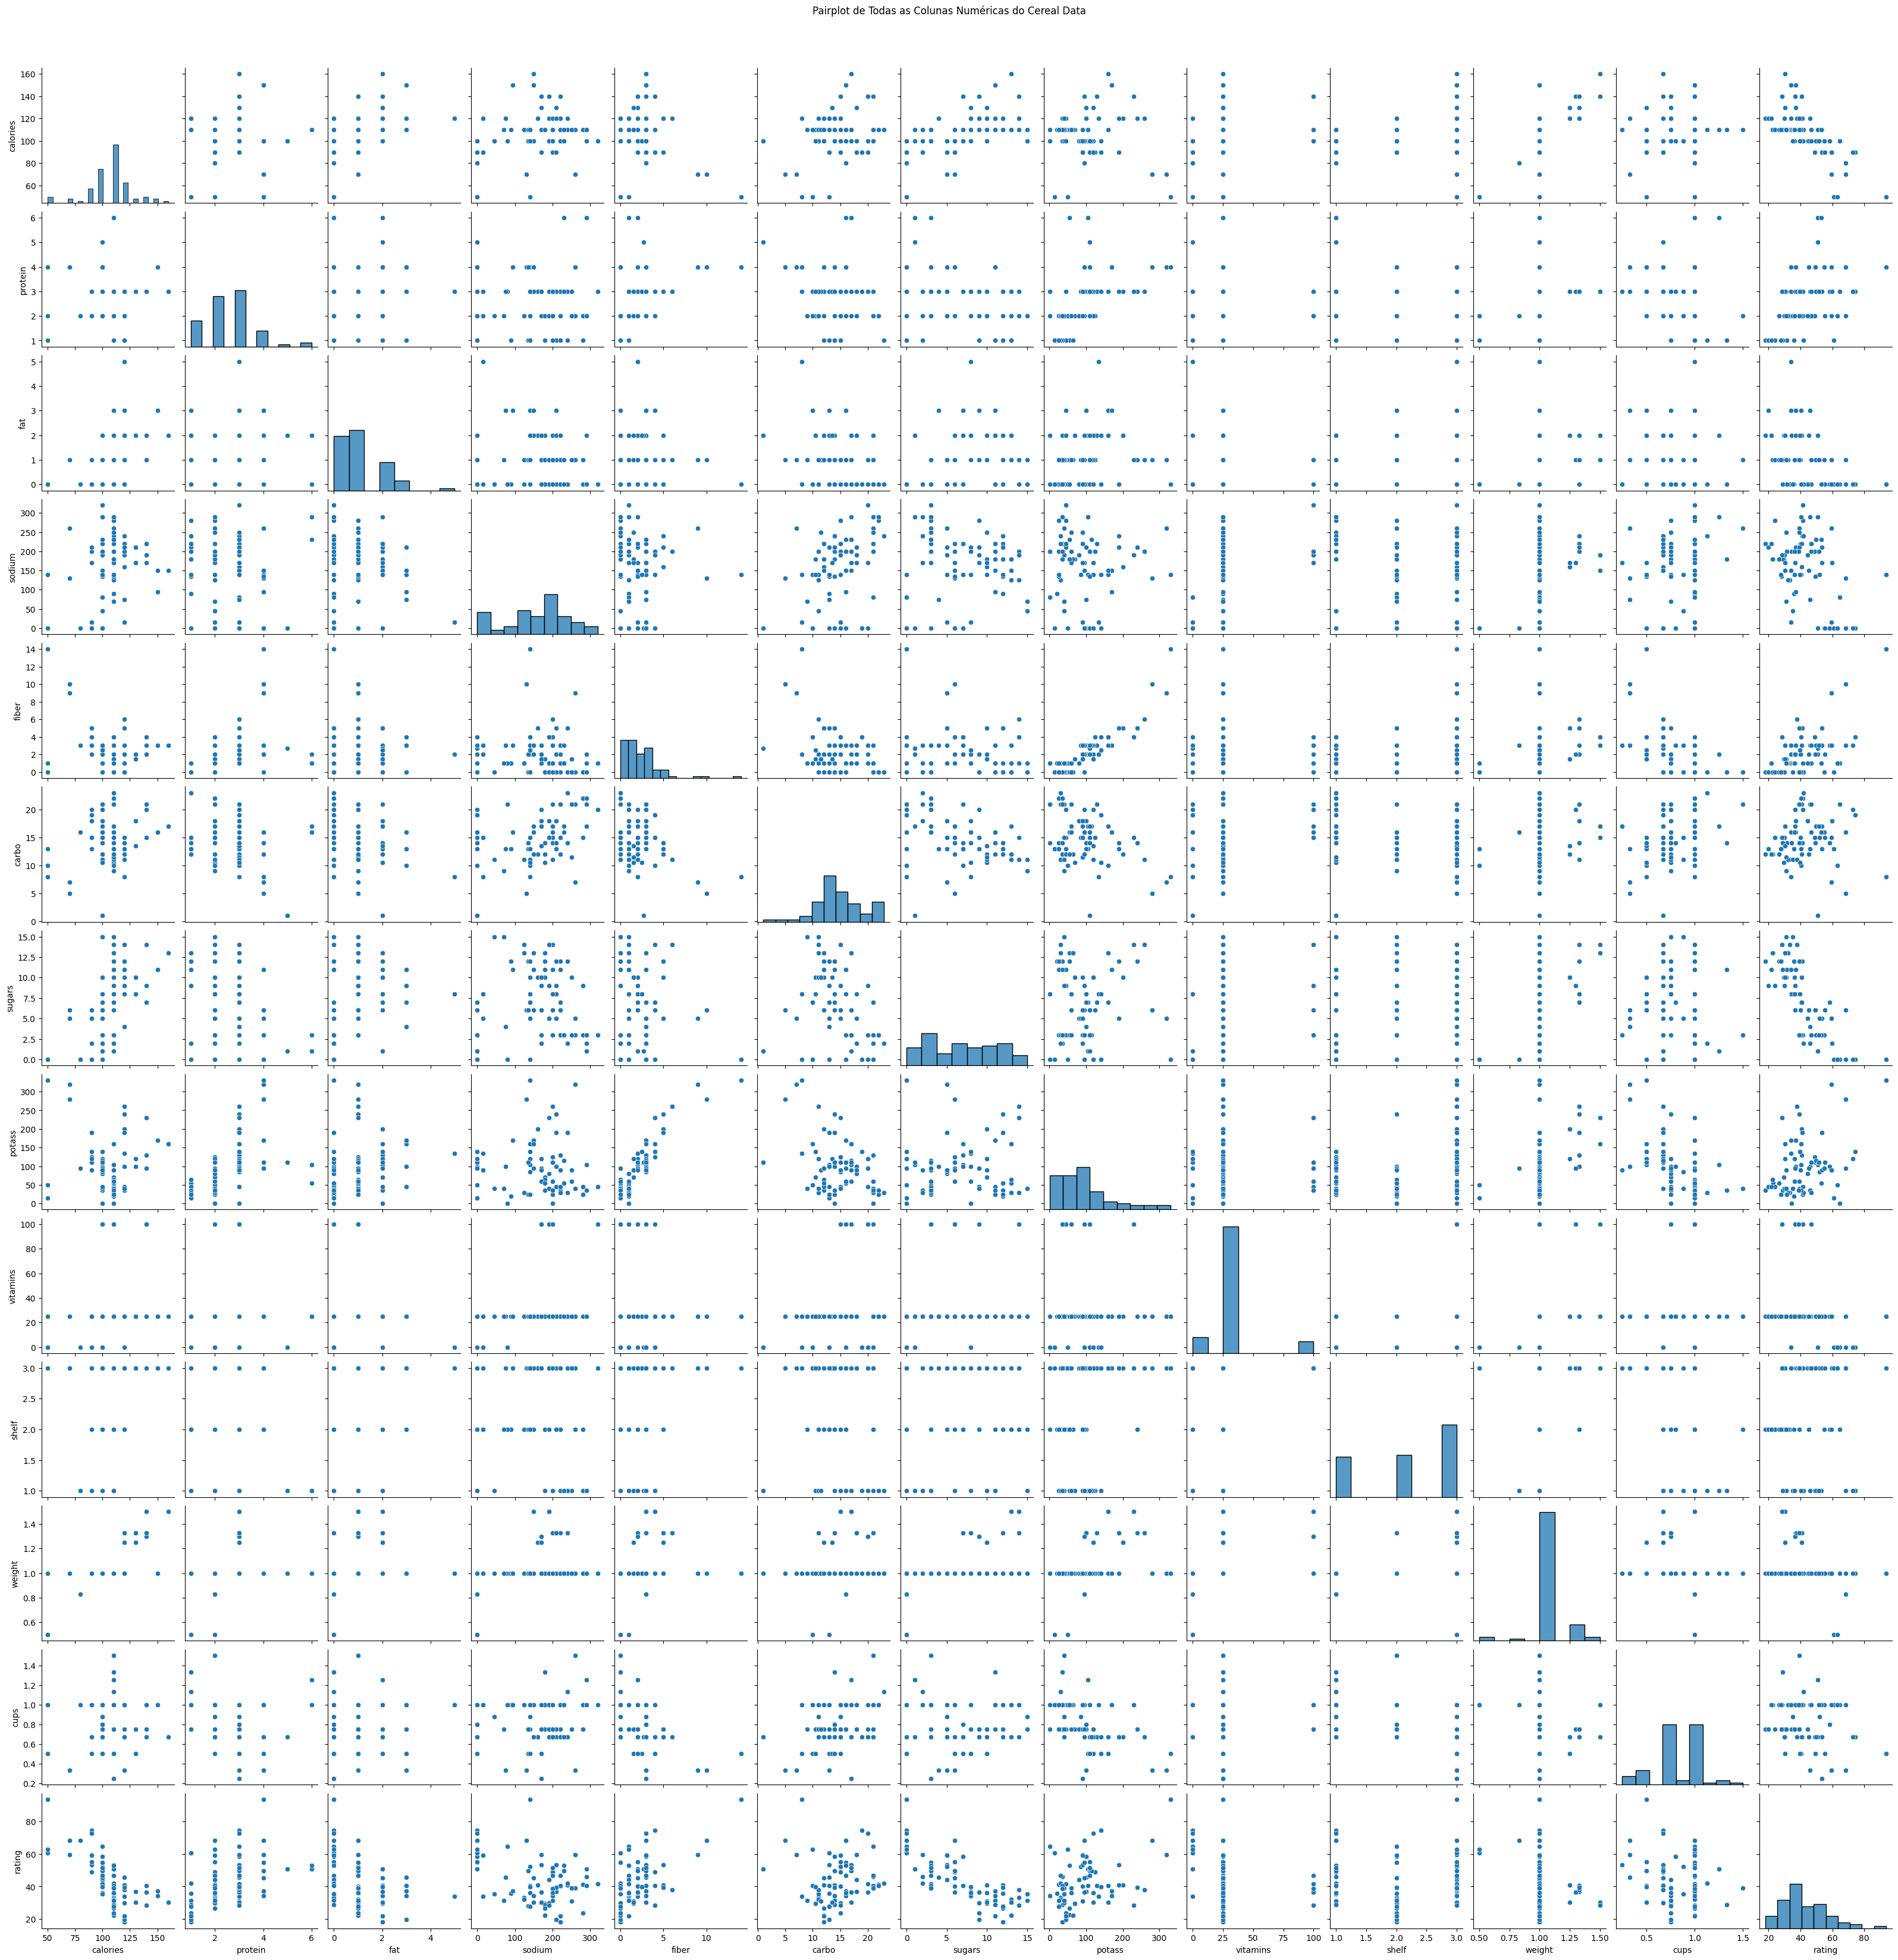

In [88]:
sns.pairplot(data=cereal)

plt.suptitle('Pairplot', y=1.02)
plt.show()

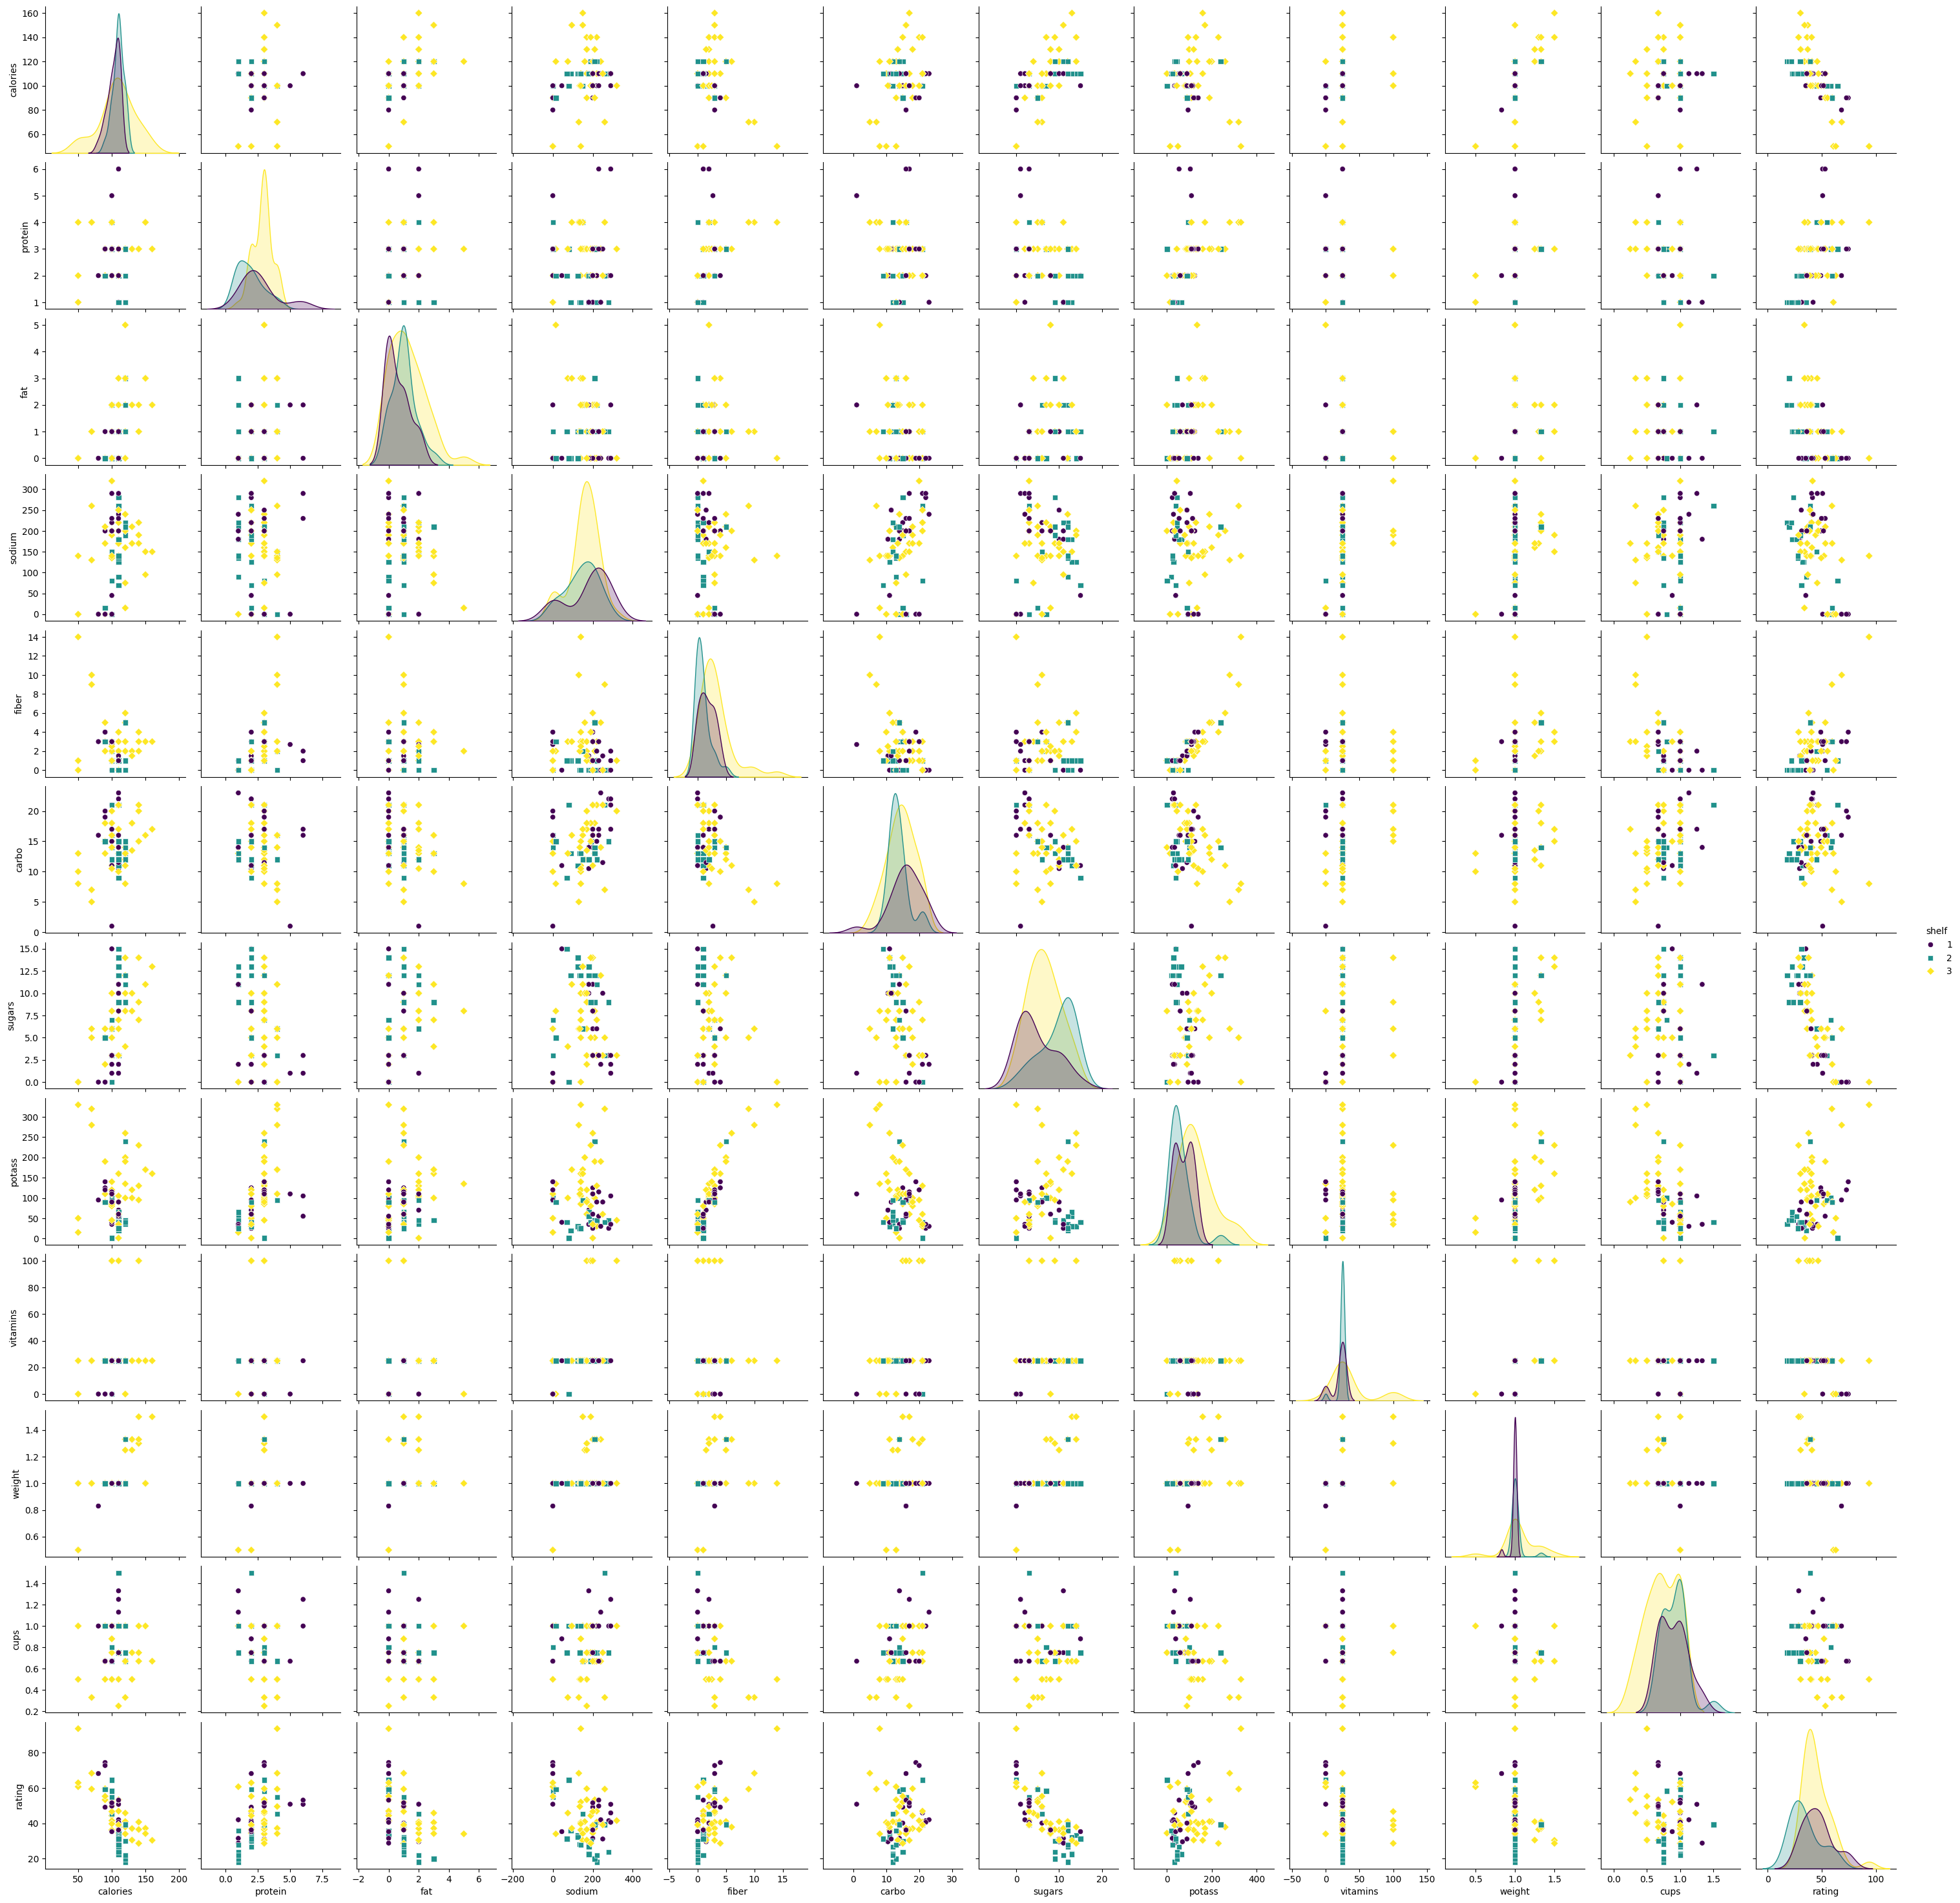

In [89]:
sns.pairplot(
    data=cereal, 
    hue='shelf', 
    palette='viridis',
    diag_kind='kde', 
    markers=["o", "s", "D"] 
)

<div style="
    background: linear-gradient(90deg, rgba(255,77,79,0.18), rgba(255,77,79,0.05));
    border-left: 6px solid #ff4d4f;
    padding: 16px 22px;
    border-radius: 12px;
    font-family: 'Segoe UI', sans-serif;
    box-shadow: 0 4px 14px rgba(255,77,79,0.2);
    color: #2a0000;
    line-height: 1.5;
">
  <h3 style="color:#b00000; margin-top:0;">⚠️ Warning — Overplotting & Visual Overload</h3>
  <p style="font-size:16px; margin:0;">
    <strong>Overplotting</strong> occurs when too many data points or graphical elements overlap in a plot,
    making it difficult or impossible to see individual values, patterns, or trends.
    This usually happens in scatter plots, line charts, or when several datasets are visualized together.
  </p>
  <p style="font-size:16px; margin-top:10px;">
    Excessive or dense visualizations can lead to <strong>visual overload</strong> — when the viewer is faced with
    too much information to interpret effectively. As a result, important insights may be lost or misunderstood.
  </p>
  <p style="font-size:16px; margin-top:10px;">
    ✅ To avoid these issues:
    <ul style="margin:6px 0 0 25px; font-size:15px;">
      <li>Reduce the number of plotted elements or use sampling.</li>
      <li>Apply transparency (<code>alpha&lt;1</code>) or small jitter to separate overlapping points.</li>
      <li>Use aggregation or density plots (<code>hexbin</code>, <code>kdeplot</code>).</li>
      <li>Split complex visuals into multiple simpler plots.</li>
    </ul>
  </p>
</div>

## Practice

* Load the diabetes dataset from sklearn.
* Explore the dataset:
  - Can you understand each line?
  - Compute descriptive analysis. How are the values distributed?
  - Plot distributions. What are the conclusions for each column?
  - What variables are correlated?

In [95]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
diabetes = load_diabetes(as_frame=True, scaled=False).frame

In [102]:
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0
